In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
# Read "costcos-geocoded" datasets
costcos_df = pd.read_csv("costcos-geocoded.csv")
costcos_df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [3]:
# Read "ppg2008" dataseta
ppg_df = pd.read_csv("ppg2008.csv")
ppg_df = ppg_df.set_index('Name  ')
ppg_df.head()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


# Heat Map

In [4]:
# Use only the first 10 rows and first 10 columns
ppg_ten_df = ppg_df.iloc[:10, :10]
ppg_ten_df

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM
Name,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7
Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,1.3
Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,2.3
Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,0.0
Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,0.8


In [15]:
# Normalize Basketball data
ppg_ten_df_norm = (ppg_ten_df - ppg_ten_df.mean()) / ppg_ten_df.std()
ppg_ten_df_norm.head()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM
Name,,,,,,,,,,
Dwyane Wade,0.667598,0.907723,1.897566,1.542701,1.535824,0.737356,0.865046,1.319968,-1.182214,-0.258678
LeBron James,0.832436,0.269480,1.159851,0.605148,0.442526,0.662876,0.722063,1.081060,-0.908553,0.388018
Kobe Bryant,0.914856,-0.794257,0.504105,0.690380,0.963144,-0.156409,-0.278817,-0.412117,0.477994,0.129339
Dirk Nowitzki,0.832436,0.269480,0.135248,0.519916,0.494587,0.290474,-0.207325,-0.531571,1.098291,-0.646696
Danny Granger,-0.321436,-0.794257,0.094264,-0.417637,0.026031,-0.901213,-0.207325,-0.412117,0.879363,1.810749


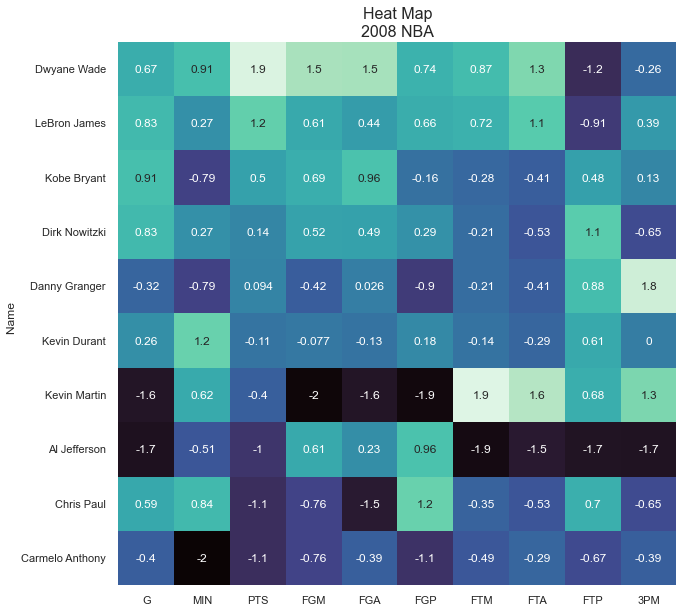

In [19]:
# Build a heatmap
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set(font_scale = 1)
heatmap_chart = sns.heatmap(ppg_ten_df_norm, cmap = "mako", 
            annot = ppg_ten_df_norm, cbar = False).set_title('Heat Map\n2008 NBA', fontdict = { 'fontsize': 16})
plt.show()


# Spatial Chart

In [7]:
# Reading the PopCenterCounty_US shapefile
states = gpd.read_file(r'PopCenterCounty_US.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [8]:
crs = {'init':'EPSG:4326'}

In [22]:
geometry = [Point(xy) for xy in zip(costcos_df['Longitude'], costcos_df['Latitude'])]
geo_df = gpd.GeoDataFrame(costcos_df, crs = crs, geometry = geometry)

#remove warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
geo_df.head()

,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (-134.48300 58.35920)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (-149.88422 61.14327)


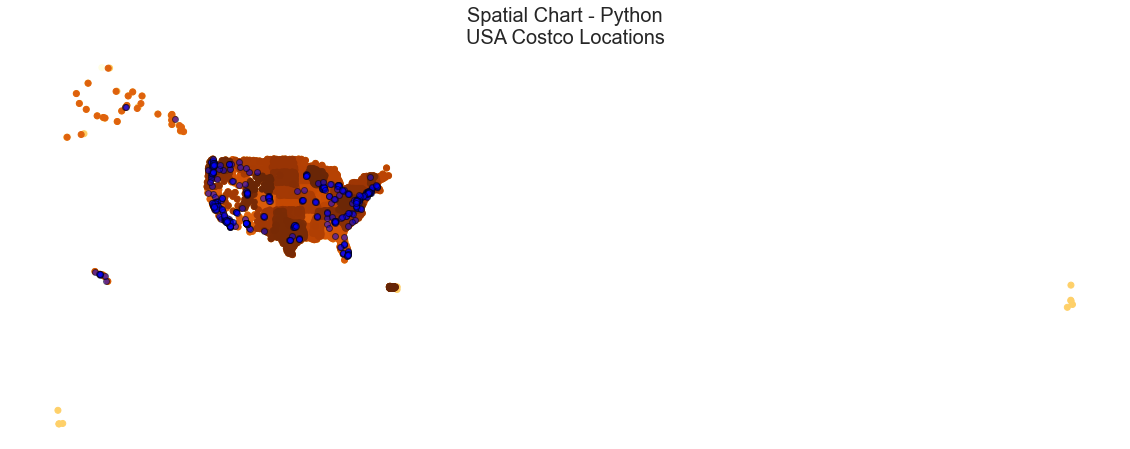

In [11]:
fig, ax = plt.subplots(figsize = (20, 20))

# Plot United States
states.to_crs(epsg = 4326).plot(ax = ax, cmap = 'YlOrBr')

# Plot Costcos Cities
geo_df.plot(ax = ax, alpha = 0.5, edgecolor = 'black', color = 'blue')

ax.set_title('Spatial Chart - Python\nUSA Costco Locations', fontsize = 20)
ax.set_axis_off()


# Contour Chart

In [12]:
# create meshgrid for basketball games and points
[X, Y] = np.meshgrid(ppg_ten_df['MIN'], ppg_ten_df['PTS'])


In [13]:
# Create Z
Z = np.sqrt(X ** 2 + Y ** 2)

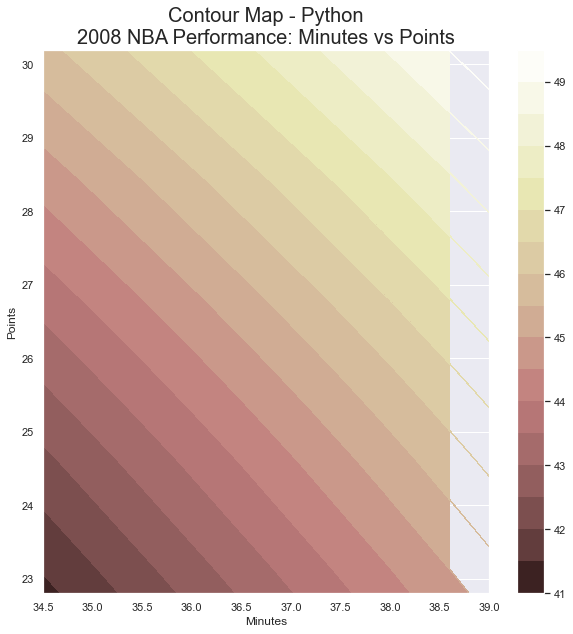

In [14]:
fig, ax = plt.subplots()

test = ax.contourf(X, Y, Z, 16, cmap='pink')
cbar = fig.colorbar(test)

ax.set_title('Contour Map - Python\n2008 NBA Performance: Minutes vs Points', fontsize = 20)
ax.set_xlabel('Minutes')
ax.set_ylabel('Points')
  
plt.show()
